# Predicción en secuencia temporal utilizando ARIMA

### Importo librerias

In [770]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from sklearn.metrics import mean_squared_error

### Importo dataset 

In [771]:
#importamos el dataset con las entevistas realizadas
young = pd.read_csv('./diario.csv', sep=';')

### Limpieza de datos

In [772]:
# Ejemplo de datos
young['fecha_datetime'] = pd.to_datetime(young['Fecha'], format='%d/%m/%Y')
young['Hora dormir']= pd.to_datetime(young['Hora a la que te dormiste'], format='%H:%M')
young['Hora despertar']=pd.to_datetime(young['Hora de despertar'], format='%H:%M')
young['horas_de_activacion'] = abs((young['Hora despertar'] - young['Hora dormir']).dt.total_seconds()/3600)

In [773]:
young=young.drop("Ciclo menstrual",1)

C:\Users\cris_\AppData\Local\Temp/ipykernel_7032/1790516259.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  young=young.drop("Ciclo menstrual",1)


In [774]:
young=young.replace(to_replace="No", value=0)
young = young.replace(to_replace="Si", value=1)
young=young.replace(to_replace="NO", value=0)
young=young.replace(to_replace="no", value=0)
young = young.replace(to_replace="SI", value=1)

### Filtrar dataset por estado de paciente bipolar

In [775]:
young=young[young["Código"]=="M"]

In [776]:
columns=['fecha_datetime','Motivación','Calidad del sueño','Ansiedad','Irritabilidad','Estado de ánimo']

In [777]:
young=young[columns]

### Seteo de índice por fecha y eliminación de duplicados

In [778]:
young.set_index('fecha_datetime', inplace=True)

In [779]:
duplicates = young.index[young.index.duplicated()]

In [780]:
young = young[~young.index.duplicated()]

In [781]:
young

,Motivación,Calidad del sueño,Ansiedad,Irritabilidad,Estado de ánimo
fecha_datetime,,,,,
2017-06-07,0,2,2,3,0
2017-06-11,-2,1,3,3,-2
2017-06-12,-3,4,1,2,-2
2017-06-14,-2,3,2,3,0
2017-06-15,-1,1,1,3,0
...,...,...,...,...,...
2018-01-31,-2,3,2,1,-2
2018-02-01,-2,1,3,1,-2
2018-02-02,-2,1,2,1,-2


In [782]:
features=['Motivación','Calidad del sueño','Ansiedad','Irritabilidad','Estado de ánimo']

### Gráfico temporal de todas las características a lo largo del tiempo

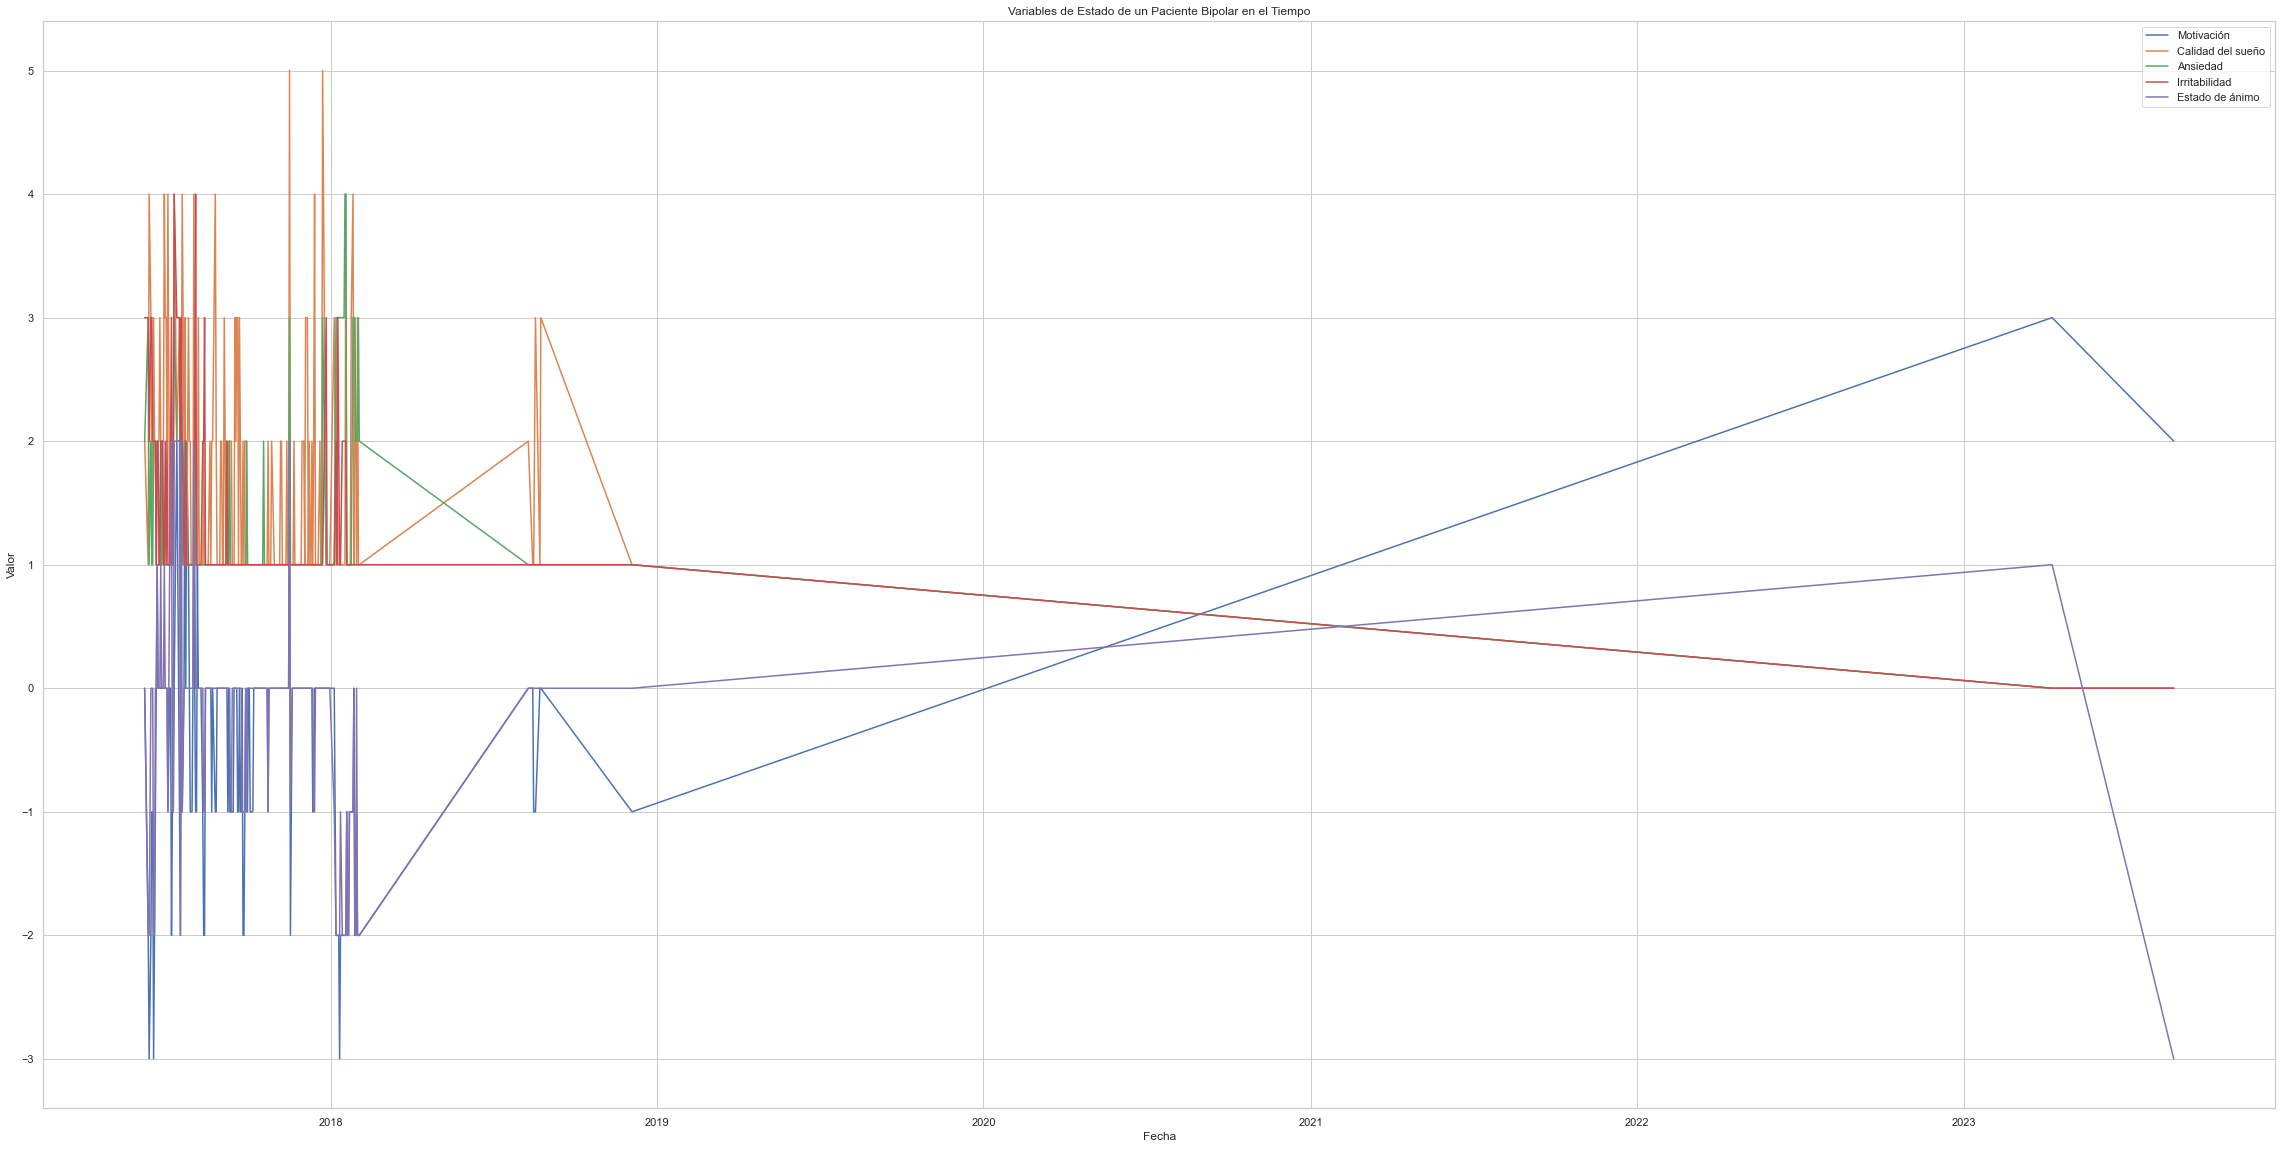

In [783]:
plt.figure(figsize=(40, 20))

for feature in features:
# Visualizar las variables de estado en el tiempo
    sns.lineplot(x='fecha_datetime', y=feature,data=young, label=feature)
plt.title('Variables de Estado de un Paciente Bipolar en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
#plt.legend()
#plt.grid(True)
plt.show()


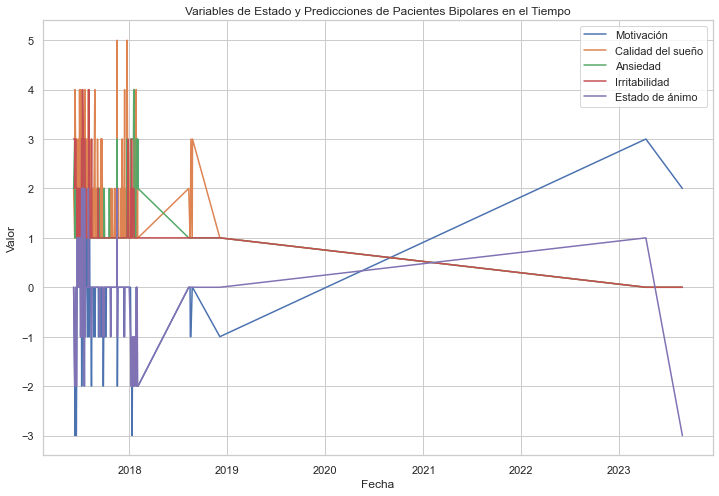

In [784]:
plt.figure(figsize=(12, 8))

for feature in features:
     sns.lineplot(x='fecha_datetime', y=feature,data=young, label=feature)
    
plt.title('Variables de Estado y Predicciones de Pacientes Bipolares en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

### Configuración de modelo ARIMA

In [724]:

# Ajustar el modelo ARIMA para predecir el estado de ánimo (por ejemplo)
p = 1  # Orden del componente autoregresivo
d = 1  # Orden de diferenciación
q = 1  # Orden del componente de media móvil

# Ajustar el modelo ARIMA para el estado de ánimo
model = ARIMA(young['Motivación'], order=(p, d, q))
results = model.fit()

# Realizar predicciones para el estado de ánimo (por ejemplo)
forecast_steps = 30  # Número de pasos a predecir (30 días en este caso)
forecast = results.get_forecast(steps=forecast_steps).predicted_mean



C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-

### Visualización de predicción del Estado de ánimo a 30 días

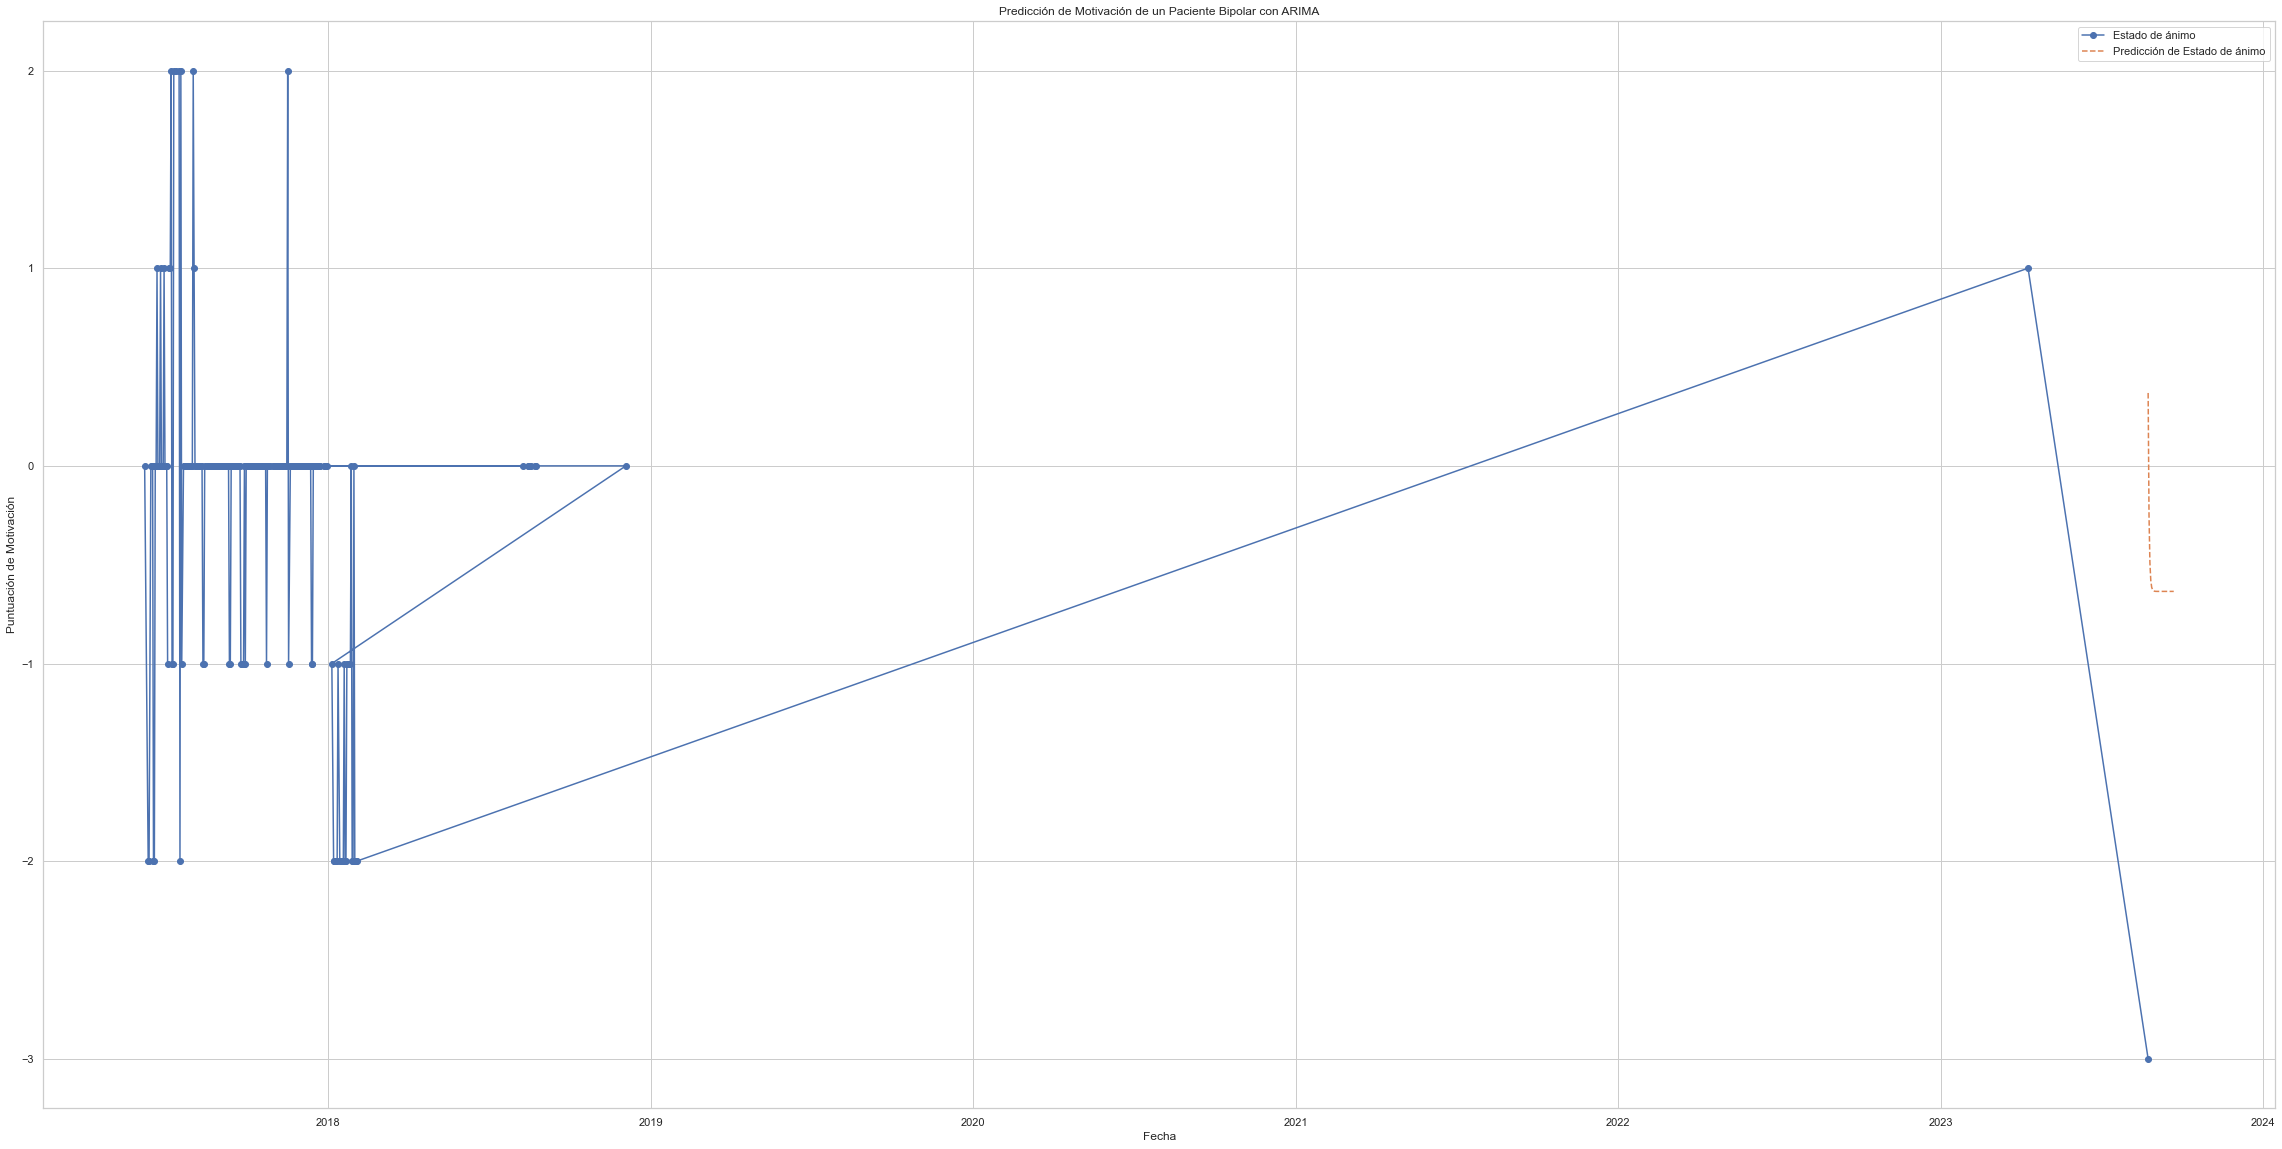

In [791]:
# Visualizar las predicciones para el estado de ánimo
plt.figure(figsize=(40, 20))


plt.plot(young.index, young['Estado de ánimo'], label='Estado de ánimo', marker='o')

plt.plot(pd.date_range(start=young.index[-1], periods=forecast_steps, freq='D'), forecast, label='Predicción de Estado de ánimo',linestyle='dashed')
plt.title('Predicción de Motivación de un Paciente Bipolar con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Puntuación de Motivación')
plt.legend()
plt.show()